*Теоретический материал:* https://youtu.be/2tMKGNYH9N0?t=132

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=730

In [ ]:
 # Этим блоком будем визуализировать
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy
 
# Библиотеки Pytorch
import torch 
import torchvision # здесь лежит mnist, cifar и много других датасетов и трансформаций для картинок
import torch.nn as nn # здесь лежат все слои
import torch.utils.data as data # работа с загрузчиком данных
import torchvision.transforms as transforms
import torchvision.datasets as dsets #работа с классом Датасет
from torch.autograd import Variable # для автоматического дифференциатора
 
# Визуализации графа
from torch.utils.tensorboard import SummaryWriter 
import datetime,os
import time
 
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
scipy.__version__

# Если версия меньше 1.2.0, то:
# pip uninstall scipy==**ваша версия**
# pip install scipy==1.3.1 

'1.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install Pillow

# Базовые понятия

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=932

Тензоры

torch.tensor = torch.FloatTensor

torch.HalfTensor 

torch.DoubleTensor

torch.ShortTensor

torch.IntTensor

torch.LongTensor

torch.CharTensor

torch.ByteTensor

In [ ]:
import gc

In [ ]:
gc.collect()

231

In [ ]:
# Создание Тензора
x = torch.tensor(5.) # Создаем скаляр
y = torch.FloatTensor([5.1]) # Список типа float
z = torch.FloatTensor(6) # Список типа float из 6ти значение
print(x)
print(y)
print(z)

tensor(5.)
tensor([5.1000])
tensor([3.5147e-35, 0.0000e+00, 6.4460e-44, 1.3873e-43, 1.5554e-43, 1.5134e-43])


In [ ]:
# Индексирование
print(z[0])
print(z[::2])

tensor(3.5146e-35)
tensor([3.5146e-35, 3.7835e-44,        nan])


In [ ]:
# Информация о тензоре
print (z.dim()) # Размерность тезора
print (z.size()) # Количество элементов
print (z.type()) # Тип элементов
print (z.data_ptr()) # Место в памяти, где хранится тензор

1
torch.Size([6])
torch.FloatTensor
90488320


**Операции над тензорами**

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=1256


In [ ]:
# Виды функций
# Immutable function (exp(), abs())

y = torch.IntTensor([-1, 2,-3]) # Создаем тензор
x = y.abs() # Вызываем метод получения модуля (Immutable)
print(y) # Выводим y
print(x) # Выводим x

tensor([-1,  2, -3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [ ]:
print(x.data_ptr(), y.data_ptr())

104521408 104520960


In [ ]:
# Mutable function
y = torch.IntTensor([-1,2,-3]) # Создаем тензор 
x = y.abs_()  # Вызываем метод получения модуля (Mutable)
print(y) # Выводим y
print(x) # Выводим x

tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [ ]:
print(x.data_ptr(), y.data_ptr())

104521344 104521344


In [ ]:
x = torch.FloatTensor(2,3) # Создаем тензор размерностью 2 на 3
x.zero_() # Заполняем его нулями
print(x) # Выводим x

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
y = torch.FloatTensor(2,3).zero_() # Создаем тензор размерностью 2 на 3 и заполняем нулями
print(y) # Выводим y

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
x = torch.tensor(3.) # Создаем тензор
y = torch.tensor(7.) # Создаем тензор
z1 = x.add(y) # Складываем x и y И записываем результат в z1
z2 = torch.add(x,y) # Складываем x и y И записываем результат в z2
x.add_(y) # Складываем x и y И записываем результат в x
print(z1, z2, x) # Выводим z1, z2, x

tensor(10.) tensor(10.) tensor(10.)


In [ ]:
x = torch.tensor(3.) # Создаем тензор
y = torch.tensor(7.) # Создаем тензор
x += y
# x = x + y
print(x)

tensor(10.)


**NumPy**

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=1563

In [ ]:
a = np.random.rand(2,2) # Сорздаем numpy массив размерностью 2 на 2 из случайных чисел
a # Выводим a

array([[0.40317161, 0.30386222],
       [0.43700082, 0.06149729]])

In [ ]:
# NumPy -> Torch
b = torch.from_numpy(a).to(torch.float16) # Переводим Numpy в Torch
b # Выводим b

tensor([[0.4031, 0.3040],
        [0.4370, 0.0615]], dtype=torch.float16)

In [ ]:
# Torch -> Numpy
c = b.numpy() # Переводим Torch в Numpy
c # Выводим c

array([[0.403 , 0.304 ],
       [0.437 , 0.0615]], dtype=float16)

**CUDA**

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=1832


In [ ]:
x.is_cuda

False

In [ ]:
!nvidia-smi

Sat Feb  6 22:41:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
if not x.is_cuda: # Если не на GPU
  x.cuda_() # Размещаем на GPU (создаем копию)
#   x = x.cuda() 
print (x.is_cuda) # Проверям: размещен ли тензор на GPU

True


In [ ]:
!nvidia-smi

Sun Feb  7 12:32:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    38W / 300W |   1241MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**AD (automatic differentiation)**

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=2117


In [ ]:
# Создаем тензоры
x = torch.tensor(5.)
w = torch.tensor(2.)
b = torch.tensor(3.)
x = Variable(x)
w = Variable(w, requires_grad=True)
b = Variable(b, requires_grad=True)

In [ ]:
# Строим вычислительный граф
y = w.mul(x).add(b)    # y = w * 5 + b
y

tensor(13., grad_fn=<AddBackward0>)

In [ ]:
w*x+b

tensor(13., grad_fn=<AddBackward0>)

In [ ]:
# Вычисляем градиенты (выполняем обратный проход и получаем производную всех переменных)
y.backward()

In [ ]:
# Посмотрим градиенты для каждого из задействованных тензоров
print(x.grad)    
print(w.grad)    
print(b.grad)    

None
tensor(5.)
tensor(1.)


# Пишем первый нейрон

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=2535

In [ ]:
# Создаем тензоры
x = torch.randn(1) # матрица случайных значений, соответствующих нормальному распределению 
y = torch.randn(1)
x = Variable(x)
y = Variable(y)

In [ ]:
print(x)
print(y)

tensor([-1.0241])
tensor([-1.3236])


In [ ]:
# Создаем 1 линейный слой (по сути, является нашей нейронной сетью из одного слоя)
# y = w*x + b
linear = nn.Linear(1, 1, bias = False) # Dense у кераса
print('веса: ', linear.weight)

веса:  Parameter containing:
tensor([[0.9996]], requires_grad=True)


In [ ]:
-1.0241 * 0.9996

-1.02369036

In [ ]:
# Применяем слой для x (прогоняем через нашу сетку)
pred = linear(x)
print(pred)

tensor([-1.0237], grad_fn=<SqueezeBackward3>)


In [ ]:
criterion = nn.MSELoss() # Функция ошибки (средне-квадратичное отклонение)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) # Оптимизатор, первый аргумент которого всегда параметры нейронной сети (в нашем случае линейный слой)
# mse += (y - y_1)**2/n
# Считаем ошибку
loss = criterion(pred, y)
print('ошибка: ', loss.item())

ошибка:  0.08995577692985535


In [ ]:
optimizer.param_groups

[{'dampening': 0,
  'lr': 0.01,
  'momentum': 0,
  'nesterov': False,
  'params': [Parameter containing:
   tensor([[0.9996]], requires_grad=True)],
  'weight_decay': 0}]

In [ ]:
-2 * (-1.0241) *(-1.3236 - 0.9996 * (-1.0241))

-0.6142749246480002

In [ ]:
# Обратное распространение 
loss.backward()

# Посмотрим на наши градиенты
print ('dL/dw: ', linear.weight.grad)

dL/dw:  tensor([[-0.6143]])


In [ ]:
-2 * x * (y - linear.weight* (x))

tensor([[-0.6143]], grad_fn=<MulBackward0>)

In [ ]:
0.9996 + (-0.01) * (-0.6143)

1.005743

In [ ]:
# Делаем шаг градиентного спуска w = w - lr*grad
optimizer.step()
print(optimizer.param_groups)

# Оптимизацию можно осуществлять также и на более низком уровне:
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Ошибка после оптимизации
pred = linear(x) 
loss = criterion(pred, y)
print('ошибка после шага оптимизации: ', loss.item())

[{'params': [Parameter containing:
tensor([[1.0058]], requires_grad=True)], 'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}]
ошибка после шага оптимизации:  0.08622186630964279


In [ ]:
# Обычно прогонка сети составляет больше одной эпохи.
# Прогоним ее 1000 эпох
for i in range(1000): 
    # Прогоняем переменную через сеть
    pred = linear(x) 

    # Считаем функцию ошибки
    loss = criterion(pred,y)

    # Обнуляем вручную градиент на каждой итерации
    optimizer.zero_grad()

    # Обратное распространение ошибки
    loss.backward()

    # Делаем шаг градиентного спуска
    optimizer.step()
    if i%10 ==0:
        print(loss.detach()) # .detach() отделяет тензор от вычислительного графа. Используется всегда при выводе значений

tensor(0.1271)
tensor(0.1165)
tensor(0.1069)
tensor(0.0980)
tensor(0.0899)
tensor(0.0824)
tensor(0.0756)
tensor(0.0693)
tensor(0.0635)
tensor(0.0583)
tensor(0.0534)
tensor(0.0490)
tensor(0.0449)
tensor(0.0412)
tensor(0.0378)
tensor(0.0347)
tensor(0.0318)
tensor(0.0291)
tensor(0.0267)
tensor(0.0245)
tensor(0.0225)
tensor(0.0206)
tensor(0.0189)
tensor(0.0173)
tensor(0.0159)
tensor(0.0146)
tensor(0.0134)
tensor(0.0123)
tensor(0.0112)
tensor(0.0103)
tensor(0.0095)
tensor(0.0087)
tensor(0.0079)
tensor(0.0073)
tensor(0.0067)
tensor(0.0061)
tensor(0.0056)
tensor(0.0052)
tensor(0.0047)
tensor(0.0043)
tensor(0.0040)
tensor(0.0036)
tensor(0.0033)
tensor(0.0031)
tensor(0.0028)
tensor(0.0026)
tensor(0.0024)
tensor(0.0022)
tensor(0.0020)
tensor(0.0018)
tensor(0.0017)
tensor(0.0015)
tensor(0.0014)
tensor(0.0013)
tensor(0.0012)
tensor(0.0011)
tensor(0.0010)
tensor(0.0009)
tensor(0.0008)
tensor(0.0008)
tensor(0.0007)
tensor(0.0006)
tensor(0.0006)
tensor(0.0005)
tensor(0.0005)
tensor(0.0005)
tensor(0.0

In [ ]:
linear.weight # Веса

Parameter containing:
tensor([[0.3941]], requires_grad=True)

In [ ]:
pred = linear(x) 
pred

tensor([-0.1832], grad_fn=<SqueezeBackward3>)

# Подготовка данных

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=4257

In [ ]:
# Скачиваем готовые данные и создаем датасет
trainDataset = dsets.CIFAR10(root='./data/', # путь, где лежат данные
                              train=True, # создание данных из тренировочной выборки
                              transform=transforms.ToTensor(), # здесь функция, превращающая PIL картинку в тензор
                              download=True) # True - данные скачиваются и помещаются в указанный путь

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [ ]:
# Возьмем пару картинка-метка из всего набора
image, label = trainDataset[9]
print(image.size())
print(image[1].size())
print(type(image)) 
print(label)

torch.Size([3, 32, 32])
torch.Size([32, 32])
<class 'torch.Tensor'>
3


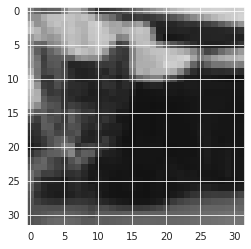

In [ ]:
im = image.numpy()[1]
x = Image.fromarray((im * 255).astype(np.uint8))
plt.imshow(x.convert('RGBA'))
plt.show()

In [ ]:
# Data Loader (наиболее эффективный способ загружать данные)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset,
                                           batch_size=100, 
                                           shuffle=True, # перемешивание данных 
                                           num_workers = 4) # сколько подпроцессов использовать для загрузки данных. 0 - по умолчанию - в основном процессе

# Когда начнется итерация, по очереди начнут выгружаться файлы из сета
dataIter = iter(trainLoader) 

# Мини batch картинок и меток
images, labels = dataIter.next()

# Обычно train_loader используется так:
for images, labels in trainLoader:
    # здесь ваш код
    pass

In [ ]:
images.shape

torch.Size([100, 3, 32, 32])

# Создание собственного набора данных

# Подготовка собственных данных

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=4620

In [ ]:
# Используем готовый data loader от torch
path = '/content/drive/My Drive/Занятия/Июльский курс/Pytorch. Часть 1/example/' 
listID = os.listdir(path)
labels = [0,1,2]
print(listID)

['cns300.jpg', 'image.jpg', 'ninja-300-right-side-view_600x400.jpg']


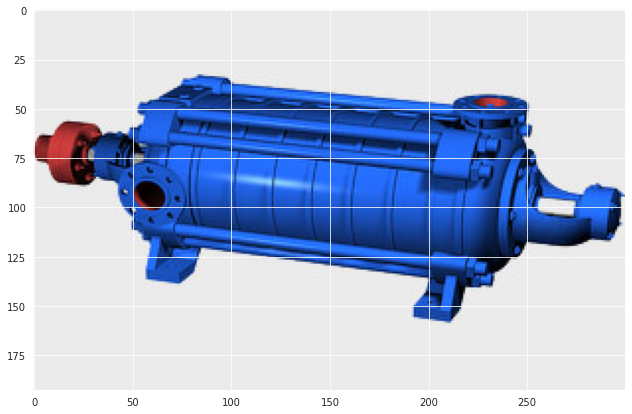

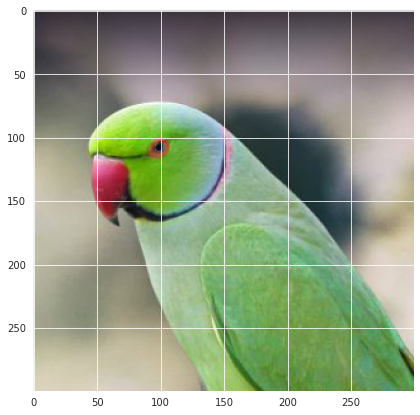

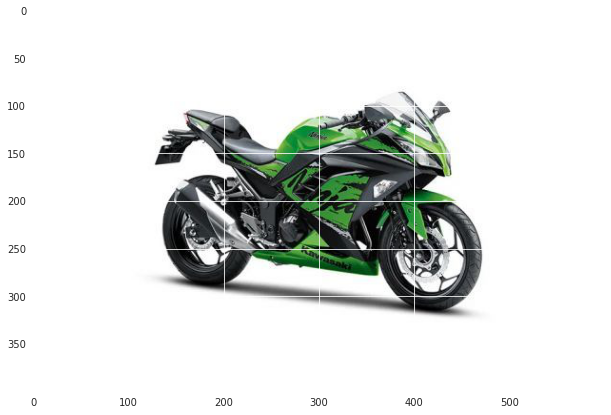

In [ ]:
for i in listID:
  plt.figure(figsize=(14,7))
  plt.imshow(Image.open(path+i))
  plt.show()

In [ ]:
# Создаем класс для собственных данных, наследуя свойства стандартного датасета
class CustomDataset(data.Dataset):
    def __init__(self, listID, labels, path, transforms = None): 
        # Инициализируем атрибуты (они абсолютно производные. У вас они могут быть совсем другими)
        self.listID = listID # listID список имен каждого экземпляра
        self.labels = labels # labels - то, что скормим как yTrain
        self.transforms = transforms # если нужны какие-то преобразования
        self.path = path # путь, где лежат данные
        

    def __getitem__(self, index):        
        # Открываем папку с данными (можно использовать numpy.fromfile, PIL.Image.open)
        ID = self.listID[index] # итерируем по каждому элементу в списке
        image = Image.open(path+ID) # извлекаем картинку по его ID

        # Если transforms заполнено, то:
        if self.transforms:
            image = self.transforms(image) # то, что лежит в transforms применяем к картинку
        trainX = image # наша картинка уходит в xTrain для этой итерации
        trainY = self.labels[index] # лейбл для этой картинки уходит в yTrain

        # Возвращаем пару экзмепляр-метка
        return trainX, trainY

    def __len__(self):
        # Здесь общий размер вашего датасета
        return len(listID)

In [ ]:
# Пример последовательности трансфорирмирования для изображений
transform = transforms.Compose([
        transforms.RandomResizedCrop((30,30)), # произвольное обрезание картинки
        transforms.ToTensor()]) # преобразование в тензор (иначе никак)


In [ ]:
customData = CustomDataset(listID,labels,path,transform)

In [ ]:
trainLoader = torch.utils.data.DataLoader(dataset=customData,
                                           batch_size=2, 
                                           shuffle=True,
                                           num_workers=4,)

In [ ]:
dataiter = iter(trainLoader)
images = dataiter.next()
images[0].shape

torch.Size([2, 3, 30, 30])

In [ ]:
images = dataiter.next()
images[0].shape

torch.Size([1, 3, 30, 30])

In [ ]:
img_ = images[0][0].numpy()
img = np.transpose(img_, (1,2,0))
img.shape

(30, 30, 3)

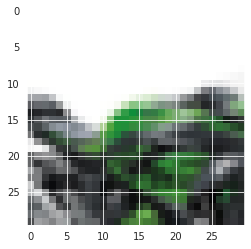

In [ ]:
plt.imshow(img)

# Сохранение и загрузка модели

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=5137

In [ ]:
# Сохранение и загрузка всей модели
torch.save(linear, 'model.pkl')
model = torch.load('model.pkl') # сохраняются даже состояния оптимизатора, результата эпох и т.д.

# Рекомендуется сохранение только параметров модели (в целях безопасности)
torch.save(linear.state_dict(), 'params.pkl')
linear.load_state_dict(torch.load('params.pkl'))

<All keys matched successfully>

# **Классифицируем MNIST**

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=6254

Задаем параметры

In [ ]:
inputSize = 784
numClasses = 10
numEpochs = 10
learningRate = 0.001 
hidden = 500

Загружаем данные 

In [ ]:
# Загрузим MNIST
batchSize = 100

# Обучающая выборка
trainDataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
# Тестовая выборка
testDataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (подготовка данных для сети)
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, # Какой датасет
                                           batch_size=batchSize, # На сколько batch разделен
                                           shuffle=True) 

testLoader = torch.utils.data.DataLoader(dataset=testDataset, #  Какой датасет
                                          batch_size=batchSize, # На сколько batch разделен
                                          shuffle=False)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Посмотрим на нашу выборку
dataIter = iter(trainLoader) # По какой выборке пройдемся
trainX, trainY = dataIter.next() # Присваиваем текущий batch

In [ ]:
trainX.shape

torch.Size([100, 1, 28, 28])

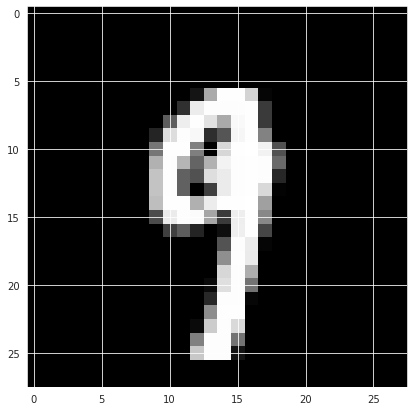

In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[1, 0], cmap='gray')
plt.show()

# Архитектура модели

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=6411

In [ ]:
# Создаем класс
class Classification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() # наследуе все свойства + добавляем свое
        self.layer1 = nn.Linear(inputSize, hidden_size) # первый слой - линейный
        self.relu = nn.ReLU() 
        self.layer2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1) # Поскольку задача классификации, то функция активации softmax

    def forward(self, x): # Здесь мы прописываем принципы, по которым данные будут проходить через сеть
        out = self.layer1(x)  # выход первого слоя
        out = self.relu(out) # применяем функцию активации к выходу первого слоя
        out = self.layer2(out) # передаем это во второй слой
        out = self.softmax(out) # применяем функцию активации ко второму слою
        return out

model = Classification(inputSize, hidden, numClasses) # Создаем объект нашей полносвязной сети

In [ ]:
# class Static_model(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.layer1 = nn.Linear(784, 200)
#     self.layer2 = nn.Linear(200, 10)
#     self.relu = nn.ReLU()
#     self.softmax = nn.Softmax(dim=1)
#     # self.tanh = nn.Tanh()

#   def forward(self, x):
#     x = self.layer1(x)
#     x = self.relu(x)
#     x = self.softmax(self.layer2(x))
#     return x

In [ ]:
trainX.view(-1, 28*28).shape # view операция идентичная reshape, за исключением, что она меняет размер массива только для данной итерации

torch.Size([100, 784])

In [ ]:
trainX.size()

torch.Size([100, 1, 28, 28])

# Функция ошибки и оптимизатор

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=6725

In [ ]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)  # оптимизатор
losses = [] # сюда будет добавляться средняя ошибка. Список будем использовать для построения графика
model.train() # переход в режим обучения (опционально)

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

# Обучаем модель

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=6897


Эпоха: [1/10], Ошибка: 2.1896
Эпоха: [2/10], Ошибка: 2.0070
Эпоха: [3/10], Ошибка: 1.8432
Эпоха: [4/10], Ошибка: 1.6240
Эпоха: [5/10], Ошибка: 1.3438
Эпоха: [6/10], Ошибка: 1.2755
Эпоха: [7/10], Ошибка: 1.0739
Эпоха: [8/10], Ошибка: 1.0274
Эпоха: [9/10], Ошибка: 0.7586
Эпоха: [10/10], Ошибка: 0.8349


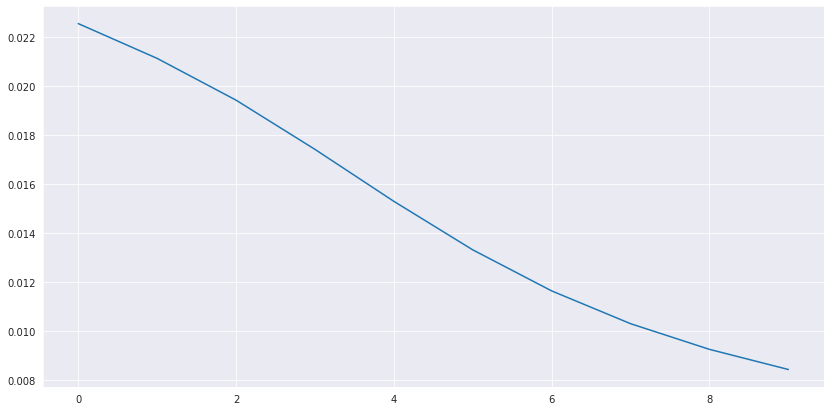

In [ ]:
for epoch in range(numEpochs): # количество эпох
    lossTot = 0 # потери в совокупности

    for i, (images, labels) in enumerate(trainLoader): # проходимся по всем данным в batch
        images = images.view(-1, 28*28) # приводим к правильному формату для сетки
        optimizer.zero_grad() # обнуляем градиент
        outputs = model(images) # здесь наше предсказание
        loss = criterion(outputs.log(), labels) # считаем ошибку 
        loss.backward()  # обратное распространение. 
                         # x.grad += dloss/dx для всех параметров x

        lossTot +=loss.detach().data # инкремент ошибки
        
        optimizer.step() # следующий шаг спуска

    losses.append(lossTot/len(trainDataset)) # вычисляем среднюю ошибку и добавляем в список
    print('Эпоха: [%d/%d], Ошибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses) # График нашего обучения
plt.show()

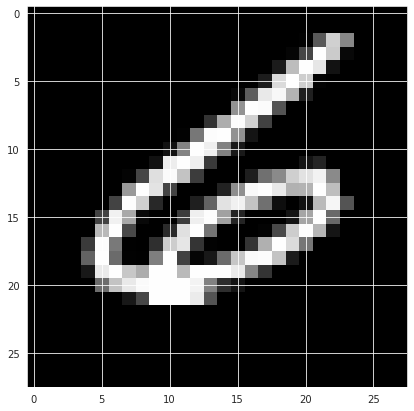

Правильный ответ tensor(6)


In [ ]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[9, 0], cmap='gray')
plt.show()
print('Правильный ответ', trainY[9])

In [ ]:
x = model(trainX[9].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) # ответ в виде вероятностей


tensor([[0.1689, 0.0163, 0.1271, 0.0138, 0.0741, 0.0741, 0.4311, 0.0146, 0.0506,
         0.0293]])
torch.return_types.max(
values=tensor([0.4311]),
indices=tensor([6]))


# Проверка работы модели

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=7147



In [ ]:
correct = 0
total = 0

model.eval() # режим проверки

for images, labels in testLoader: # итерируем по проверочному датасету
    images = images.view(-1, 28*28) # приводим к нужному формату
    result = labels
    outputs = model(images) # делаем прогноз
    _, predicted = torch.max(outputs.data, 1) # _ максимальное значение пропускаем, нас интересует, что это за цифра
    total += labels.size(0) # 0 - первое/единственное значение
    correct += (predicted == labels).sum() 
    
print('Точность для 10000 картинок: %d %%' % (100 * correct // total))

Точность для 10000 картинок: 84 %


In [ ]:
print(outputs[0], torch.max(outputs.data, 1))
print(result)

tensor([0.0144, 0.1414, 0.0938, 0.1033, 0.0204, 0.0813, 0.0393, 0.0183, 0.4575,
        0.0302], grad_fn=<SelectBackward>) torch.return_types.max(
values=tensor([0.4575, 0.3780, 0.6586, 0.3754, 0.1580, 0.3275, 0.2888, 0.1693, 0.7614,
        0.7415, 0.3259, 0.8368, 0.2417, 0.3587, 0.2530, 0.4533, 0.5156, 0.6509,
        0.3619, 0.6193, 0.6356, 0.6105, 0.2285, 0.6442, 0.3568, 0.2055, 0.3096,
        0.5124, 0.4840, 0.7135, 0.7497, 0.8182, 0.4366, 0.3878, 0.4838, 0.7515,
        0.4632, 0.3596, 0.7322, 0.8715, 0.4023, 0.3681, 0.5816, 0.2884, 0.3017,
        0.4340, 0.7658, 0.3845, 0.6893, 0.6904, 0.6227, 0.6172, 0.8548, 0.4591,
        0.3575, 0.2655, 0.5122, 0.6019, 0.3872, 0.2207, 0.5384, 0.7598, 0.6409,
        0.6909, 0.6708, 0.4402, 0.6579, 0.4388, 0.8104, 0.6556, 0.3015, 0.4987,
        0.5835, 0.4001, 0.5881, 0.3727, 0.4633, 0.4635, 0.4519, 0.6792, 0.2637,
        0.3537, 0.4021, 0.9482, 0.8131, 0.2535, 0.3305, 0.6156, 0.4362, 0.8675,
        0.7630, 0.4837, 0.5055, 0.8173, 0.8866

# Сверточная сеть

*Разбор данного раздела:* https://youtu.be/2tMKGNYH9N0?t=7372


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding = 2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer1 = self.layer1.cuda()

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding = 2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = self.layer2.cuda()

        self.fc = nn.Linear(7*7*32, numClasses)
        self.fc = self.fc.cuda()
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = CNN()

In [ ]:
class CNN_(nn.Module):
    def __init__(self):
        super(CNN_, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding = 2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer1 = self.layer1
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding = 2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = self.layer2
        self.fc = nn.Linear(7*7*32, numClasses)
        self.fc = self.fc
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = CNN_()
model.cuda()

CNN_(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [ ]:
# Ошибка и оптимизатор
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)  
model.train()

CNN_(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

Эпоха: [1/10], Шаг: [100/600], Ошибка: 0.0064
Эпоха: [1/10], Шаг: [200/600], Ошибка: 0.0005
Эпоха: [1/10], Шаг: [300/600], Ошибка: 0.0043
Эпоха: [1/10], Шаг: [400/600], Ошибка: 0.0071
Эпоха: [1/10], Шаг: [500/600], Ошибка: 0.0124
Эпоха: [1/10], Шаг: [600/600], Ошибка: 0.0007
Эпоха: [2/10], Шаг: [100/600], Ошибка: 0.0007
Эпоха: [2/10], Шаг: [200/600], Ошибка: 0.0268
Эпоха: [2/10], Шаг: [300/600], Ошибка: 0.0029
Эпоха: [2/10], Шаг: [400/600], Ошибка: 0.0010
Эпоха: [2/10], Шаг: [500/600], Ошибка: 0.0002
Эпоха: [2/10], Шаг: [600/600], Ошибка: 0.0010
Эпоха: [3/10], Шаг: [100/600], Ошибка: 0.0061
Эпоха: [3/10], Шаг: [200/600], Ошибка: 0.0013
Эпоха: [3/10], Шаг: [300/600], Ошибка: 0.0041
Эпоха: [3/10], Шаг: [400/600], Ошибка: 0.0039
Эпоха: [3/10], Шаг: [500/600], Ошибка: 0.0060
Эпоха: [3/10], Шаг: [600/600], Ошибка: 0.0261
Эпоха: [4/10], Шаг: [100/600], Ошибка: 0.0003
Эпоха: [4/10], Шаг: [200/600], Ошибка: 0.0083
Эпоха: [4/10], Шаг: [300/600], Ошибка: 0.0340
Эпоха: [4/10], Шаг: [400/600], Оши

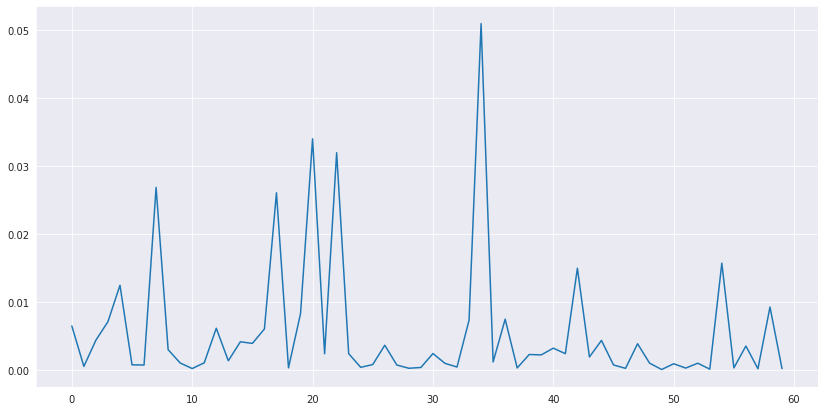

Время обработки:  55


In [ ]:
# Обучение модели
history = []
curTime = time.time()
for epoch in range(numEpochs):
    for i, (images, labels) in enumerate(trainLoader):   
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()             
        if (i+1) % 100 == 0:
            print('Эпоха: [%d/%d], Шаг: [%d/%d], Ошибка: %.4f' 
                  % (epoch+1, numEpochs, i+1, len(trainDataset)//batchSize, loss))
            history.append(loss)   
plt.figure(figsize = (14,7))
plt.plot(history)
plt.show()
print('Время обработки: ', round(time.time() - curTime))

In [ ]:
%%timeit -r 1
# Проверка результатов
model.eval()  # включаем режим проверки
device = 'cuda'

model.to(device)
# model.cuda()

correct = 0
total = 0
 
for images, labels in testLoader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Точность для 10000 картинок: %d %%' % (100 * correct // total))

Точность для 10000 картинок: 99 %
Точность для 10000 картинок: 99 %
1 loop, best of 1: 705 ms per loop


In [ ]:
# Можно ли без DataLoader?
model.eval().cuda()
images = torch.rand(size=(100, 1, 28,28)).cuda()
labels = torch.randint(0,10, size=(100,)).cuda()

history = []
curTime = time.time()
for epoch in range(numEpochs):
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()             
    print('Эпоха: [%d/%d], Ошибка: %.4f' 
            % (epoch+1, numEpochs, loss))
    history.append(loss)   

Эпоха: [1/10], Ошибка: 2.3005
Эпоха: [2/10], Ошибка: 2.3005
Эпоха: [3/10], Ошибка: 2.3002
Эпоха: [4/10], Ошибка: 2.3001
Эпоха: [5/10], Ошибка: 2.3001
Эпоха: [6/10], Ошибка: 2.3000
Эпоха: [7/10], Ошибка: 2.2998
Эпоха: [8/10], Ошибка: 2.2995
Эпоха: [9/10], Ошибка: 2.2990
Эпоха: [10/10], Ошибка: 2.2983


# **Глоссарий**
*   **train dataset** - объект, включающий в себя ваш набор данных. На выходе такого объекта всегда должен быть тензор.
*   **train loader** - объект, в который вы подгружаете ваш train dataset, и который используете при обучении нейронной сети для итерирования по всему набору данных. 
*   **optimizer.zero_grad()** - обнуляет результат дифференциирования.
*   **loss.backward()** - считает градиент для обратного распространения ошибки. 
*   **optimizer.step()** - принимает (автоматически) посчитанные градиенты и делает шаг оптимизации.
*   **nn.Module** - базовый класс нейронной сети, на котором строится собственная нейронная сеть.
*   **def forward(self,x)** - функция-движитель. Связывает инициализированные слои. На вход принимается х (batch) и передается дальше по всем слоям.
*   **data.Dataset** -  базовый класс дата сета, на котором строится собственный датасет.
*   **.view()** - функция, интерпретирующая размер объекта для данной итерации в том виде, который указан в качестве параметра.
*   **.data** - получить исключительно статичные данные из тензора.
*   **.detach()** - открепить тензор от вычислительного графа.
*   **model.train()** - перевести объект нейронки в обучающи режим.
*   **model.eval()** - перевести объект нейронки в режим оценки.

# **Обратите внимание**

*   В параметрах тензора вы можете вручную прописать поддержку дифференциирования
*   Для удобства всегда создавайте DataLoader. Для DataLoader необходим Dataset
*   Dataset всегда можно прописать "вручную"
*   Прописываете архитектуру модели через отдельный класс
*   Выбирая функцию ошибки, смотрите, какой формат должен подаваться на вход
*   Во время обучения не забывайте о последовательности .zero_grad -> .backward -> .step
*   Режимы тренировочный и оценочный являются *разными* для Pytorch. Не забывайте указывать это в начале.    


